#### Using Boston Dataset to perform Ridge and Lasso Regression
Notebook adapted from:
[source: 'https://github.com/Yorko/mlcourse.ai/blob/master/jupyter_english/topic06_features_regression/lesson6_lasso_ridge.ipynb' ]

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'
import seaborn as sns; sns.set() # just to use the seaborn theme


from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LassoCV, RidgeCV, Lasso, Ridge

#### We will work with Boston House Pricing Dataset

In [2]:
boston = load_boston()
X, y = boston['data'], boston['target']

In [3]:
print(boston.DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Lasso Regression

Lasso regression minimizes mean squared error with L1 regularization:$$\Large error(X, y, w) = \frac{1}{2} \sum_{i=1}^\ell {(y_i - w^Tx_i)}^2 + \alpha \sum_{i=1}^d |w_i|$$

where $y = w^Tx$ hyperplane equation depending on model parameters $w$, $\ell$ is number of observations in data $X$, $d$ is number of features, $y$ target values, $\alpha$ regularization coefficient.

Let's fit Lasso Regression with the small $\alpha$ coefficient (weak regularization). Coefficient related to NOX feature (nitric oxides concentration) will be zero. It means that this feature is the least important for median house prices prediction in this region.

In [4]:

lasso = Lasso(alpha=0.1)
lasso.fit(X,y)
lasso.coef_

array([-0.09789363,  0.04921111, -0.03661906,  0.95519003, -0.        ,
        3.70320175, -0.01003698, -1.16053834,  0.27470721, -0.01457017,
       -0.77065434,  0.01024917, -0.56876914])

### Let's train Lasso Regression with $\alpha=10$. All of the coefficients are equal to zero except features ZN (proportion of residential land zoned for lots over 25,000 sq.ft.), TAX (full-value property-tax rate), B (proportion of blacks by town) and LSTAT (% of lower status of the population).

In [5]:
lasso = Lasso(alpha=10)
lasso.fit(X,y)
lasso.coef_

array([-0.        ,  0.02614602, -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.00928242,
       -0.        ,  0.00749584, -0.56403807])

### Plot to see how regularization changes as alpha changes

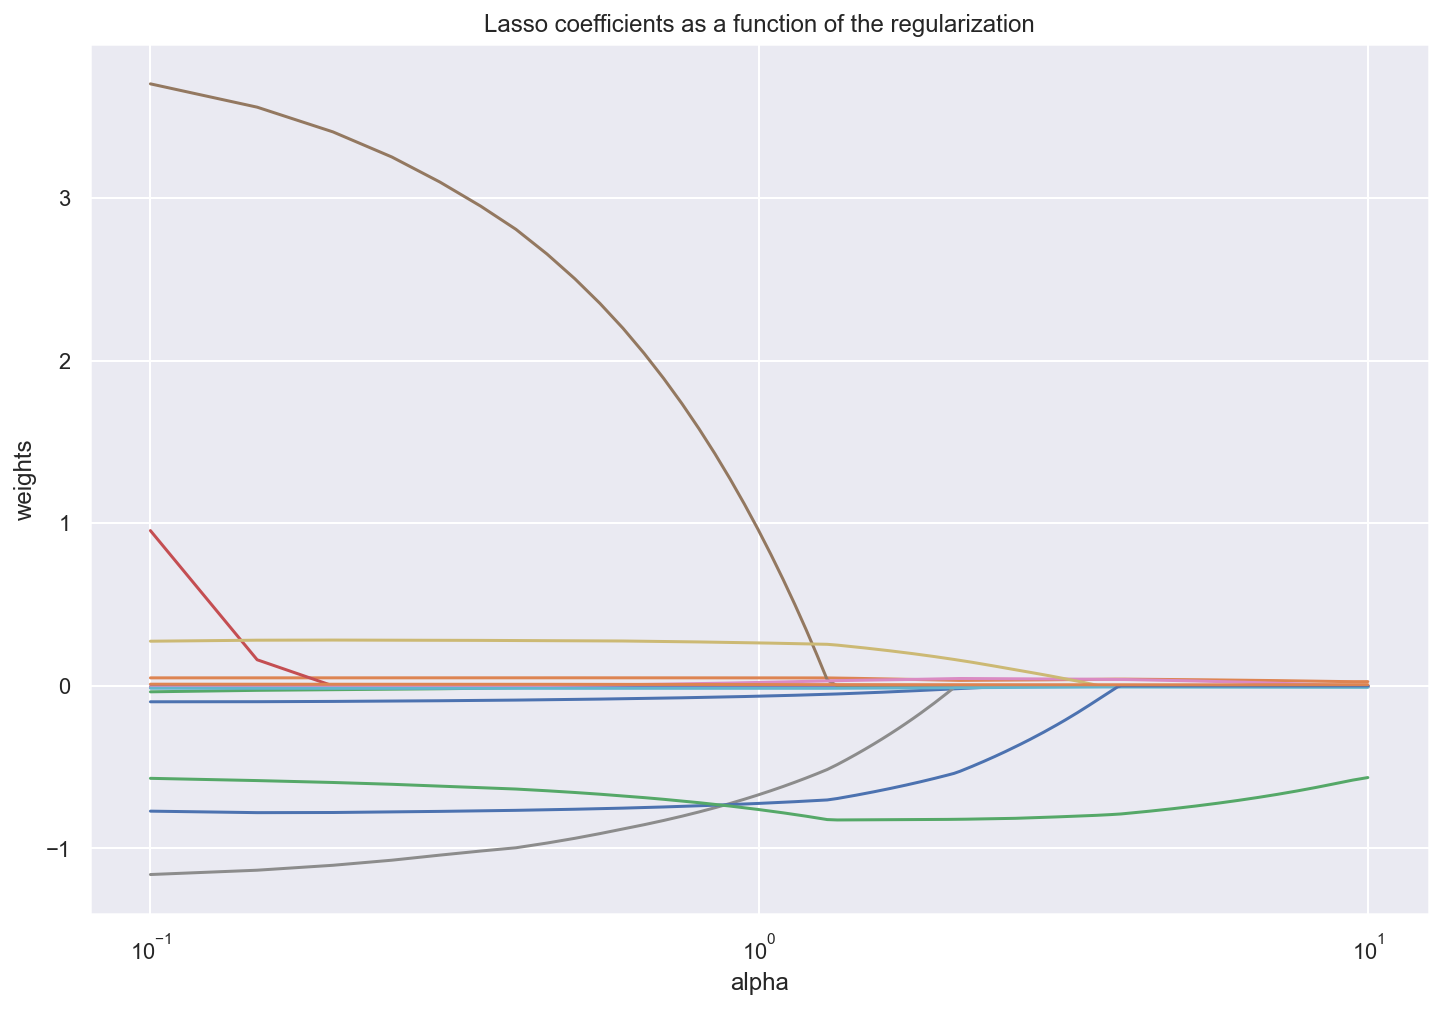

In [7]:
n_alphas = 200
alphas = np.linspace(0.1, 10, n_alphas)
model = Lasso()

coefs = []
for a in alphas:
    model.set_params(alpha=a)
    model.fit(X, y)
    coefs.append(model.coef_)

plt.rcParams['figure.figsize'] = (12, 8)

ax = plt.gca()
# ax.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])

ax.plot(alphas, coefs)
ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show();

### Ridge Regression
Ridge regression minimizes mean squared error with L2 regularization:$$\Large error(X, y, w) = \frac{1}{2} \sum_{i=1}^\ell {(y_i - w^Tx_i)}^2 + \alpha \sum_{i=1}^d w_i^2$$

where $y = w^Tx$ hyperplane equation depending on model parameters $w$, $\ell$ is number of observations in data $X$, $d$ is number of features, $y$ target values, $\alpha$ regularization coefficient.

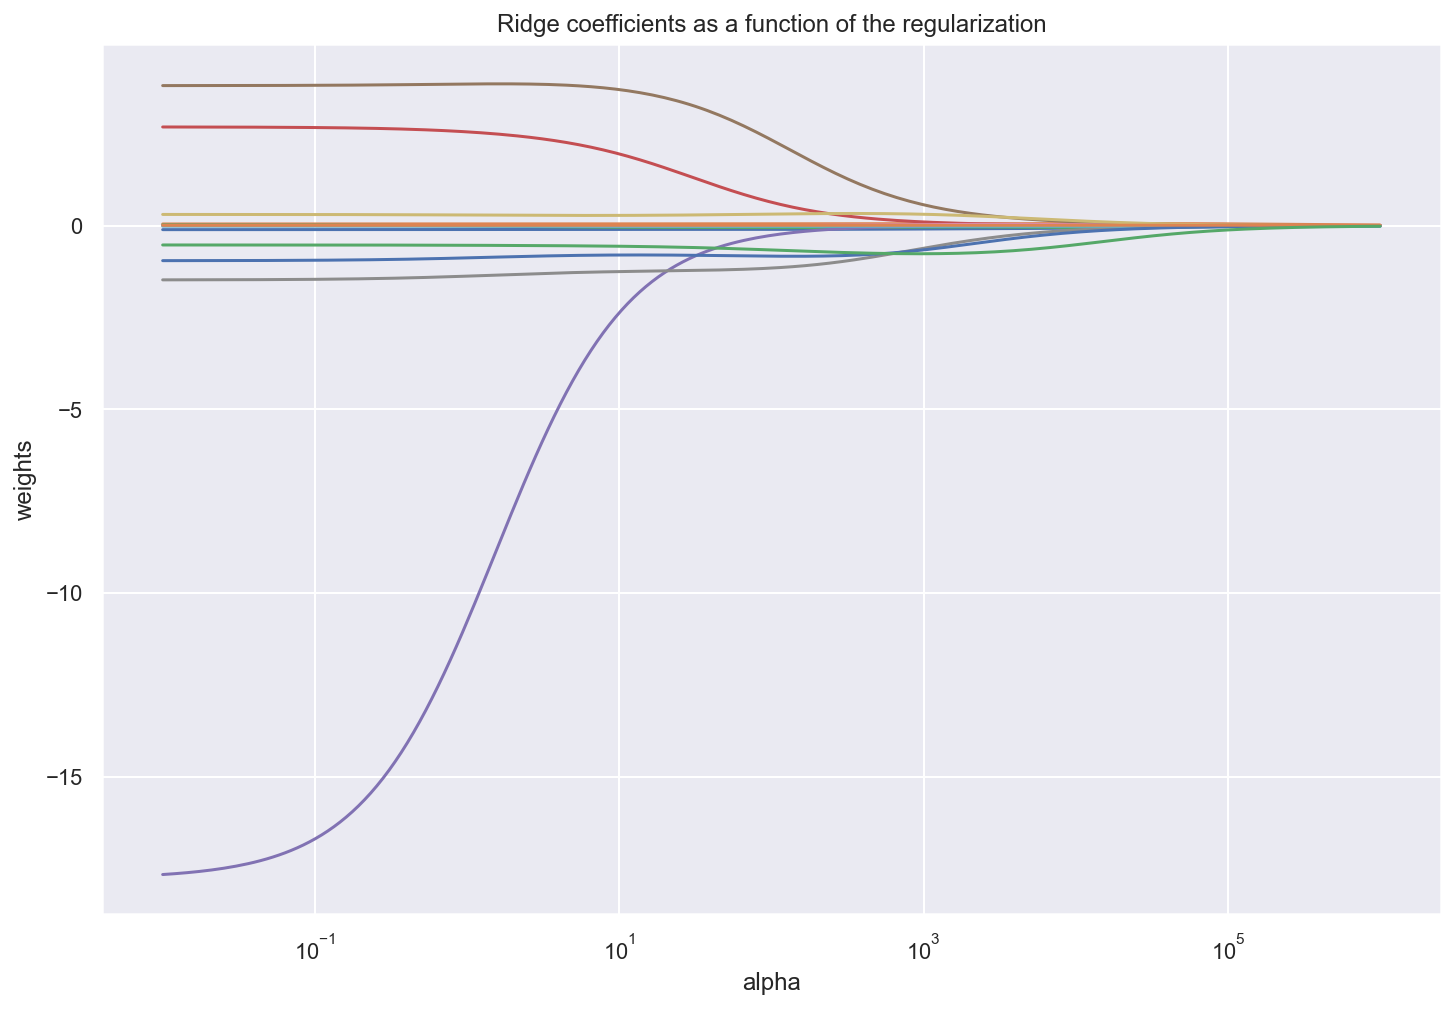

In [11]:
ridge_alphas = np.logspace(-2, 6, n_alphas)
model = Ridge()

coefs = []
for a in ridge_alphas:
    model.set_params(alpha=a)
    model.fit(X, y)
    coefs.append(model.coef_)
    
ax = plt.gca()
# ax.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])

ax.plot(ridge_alphas, coefs)
ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()